In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [39]:
df=pd.read_csv('/home/mohamed/Desktop/Student_Performance.csv')
df=pd.DataFrame(df)
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

In [40]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Drop or fill missing values depending on how many are missing
df = df.dropna()  # or use df.fillna(method='ffill') if appropriate


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


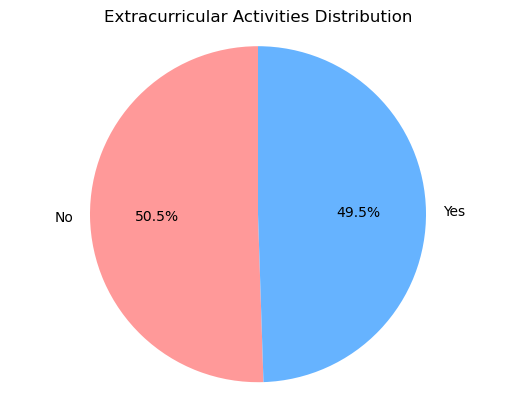

In [41]:
# تحويل الـ 'Extracurricular Activities' لـ numeric
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# نحسب عدد الـ 'Yes' و 'No'
counts = df['Extracurricular Activities'].value_counts()
print(counts)
# نحدد الألوان والتسميات
labels = ['No', 'Yes']  # التسميات بناءً على 1 و 0
colors = ['#ff9999', '#66b3ff']  # ألوان للـ 'Yes' و 'No'

# نرسم الـ Pie Chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # علشان الدائرة تبقى متساوية
plt.title('Extracurricular Activities Distribution')
plt.show()


AttributeError: QuadMesh.set() got an unexpected keyword argument 'map'

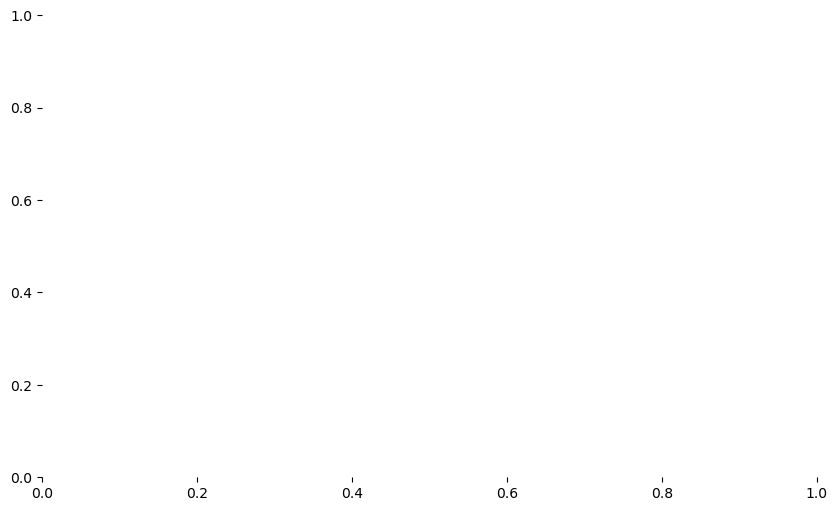

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(),annot=True,map='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
x = df.iloc[:, 1].values.reshape(-1, 1)
y=df.iloc[:,-1].values
print(x)
print(y)

[[99]
 [82]
 [51]
 ...
 [83]
 [97]
 [74]]
[91. 65. 45. ... 74. 95. 64.]


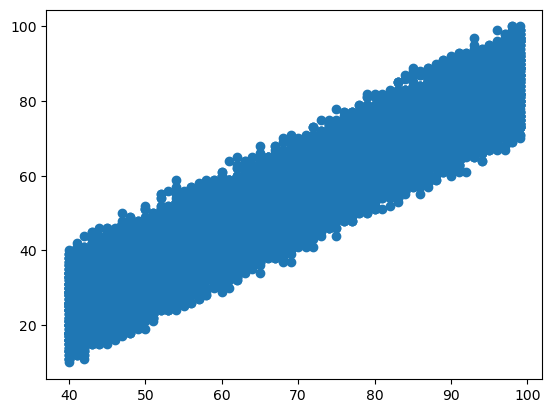

In [ ]:
plt.scatter(x,y)  #shows as linear so we will use linear regression
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)



In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
error=y_pred-y_test
error

array([-0.32313829, -4.44673041, -3.9170499 , ...,  6.01232603,
        1.2531173 ,  5.21780526])

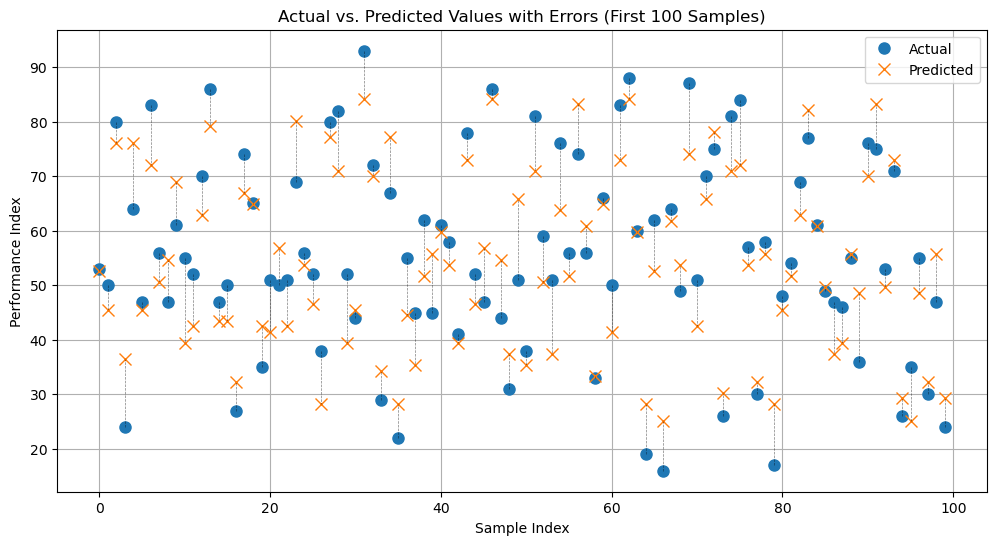

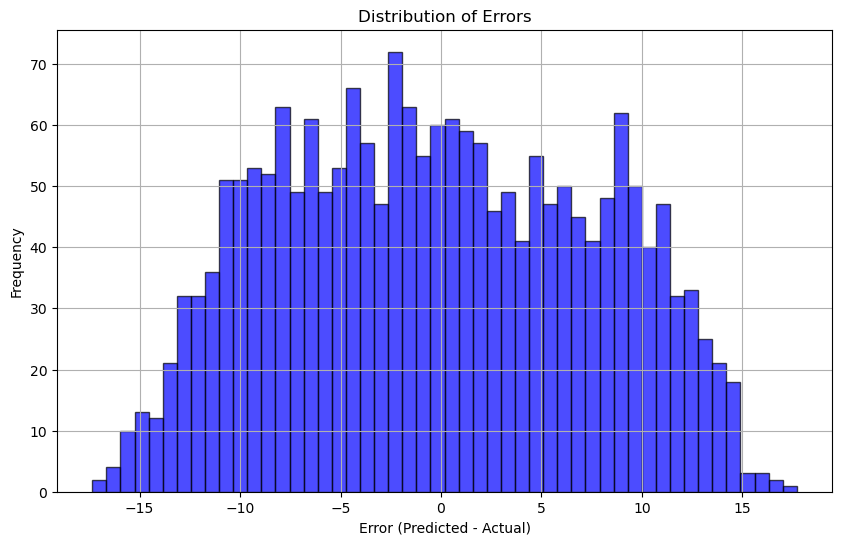

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], 'o', label='Actual', markersize=8)
plt.plot(y_pred[:100], 'x', label='Predicted', markersize=8)

# Add error lines between actual and predicted
for i in range(100):
    plt.plot([i, i], [y_test[i], y_pred[i]], 'k--', linewidth=0.5, alpha=0.5)

plt.title('Actual vs. Predicted Values with Errors (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(error, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Errors')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Simple Linear Regression:
R²: 0.825905155222155
MSE: 59.906453523970534


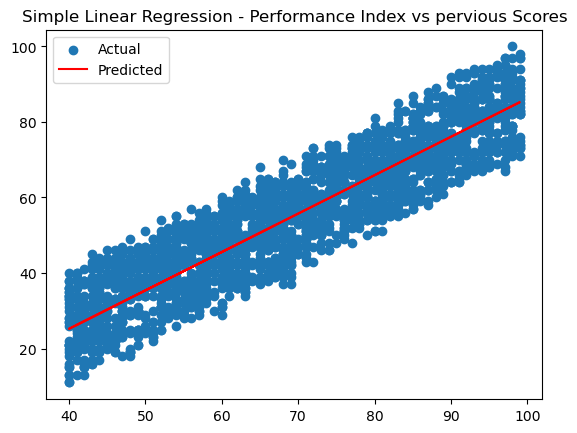

In [ ]:



y_pred_s = model.predict(x_test)

# Evaluation
print("Simple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_s))
print("MSE:", mean_squared_error(y_test, y_pred_s))

# Visualization
plt.scatter(x_test, y_test, label="Actual")
plt.plot(x_test, y_pred_s, color="red", label="Predicted")
plt.title("Simple Linear Regression - Performance Index vs pervious Scores")
plt.legend()
plt.show()


In [ ]:
x_multi=df.iloc[:,0:-1].values


x_train_multi,x_test_multi,y_train_multi,y_test_multi=train_test_split(x_multi,y,test_size=0.20,random_state=0)



In [ ]:
model_multi = LinearRegression()
model_multi.fit(x_train_multi, y_train)
y_pred_multi = model_multi.predict(x_test_multi)

print("Multiple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))



Multiple Linear Regression:
R²: 0.9880686410711422
MSE: 4.105609215835822


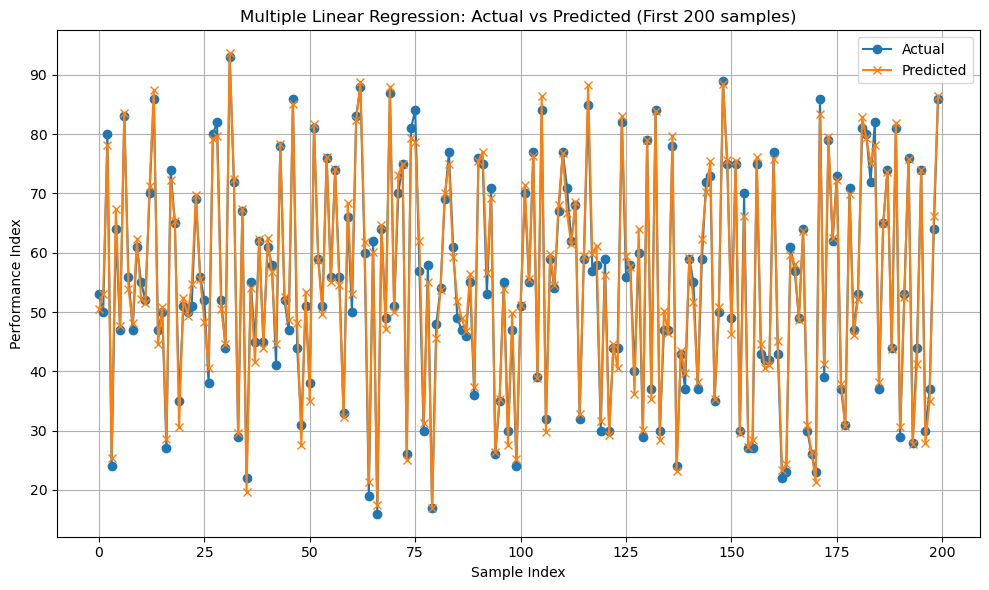

In [ ]:
plt.figure(figsize=(10, 6))
# Remove .values from y_test_multi
plt.plot(y_test_multi[:200], label='Actual', marker='o')  # Fixed line
plt.plot(y_pred_multi[:200], label='Predicted', marker='x')
plt.title('Multiple Linear Regression: Actual vs Predicted (First 200 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4]
results = {}

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_pred = model.predict(X_test_poly)
    
    # Store results
    results[degree] = {
        'model': model,
        'r2': r2_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    print("MSE:", mean_squared_error(y_test, y_pred))



MSE: 59.940328744666765
MSE: 59.96957876908539
MSE: 59.9402210722185


In [ ]:
# Print metrics
for degree in degrees:
    print(f"Degree {degree}:")
    print(f"  R² = {results[degree]['r2']:.3f}")
    print(f"  MSE = {results[degree]['mse']:.1f}\n")


Degree 2:
  R² = 0.826
  MSE = 59.9

Degree 3:
  R² = 0.826
  MSE = 60.0

Degree 4:
  R² = 0.826
  MSE = 59.9



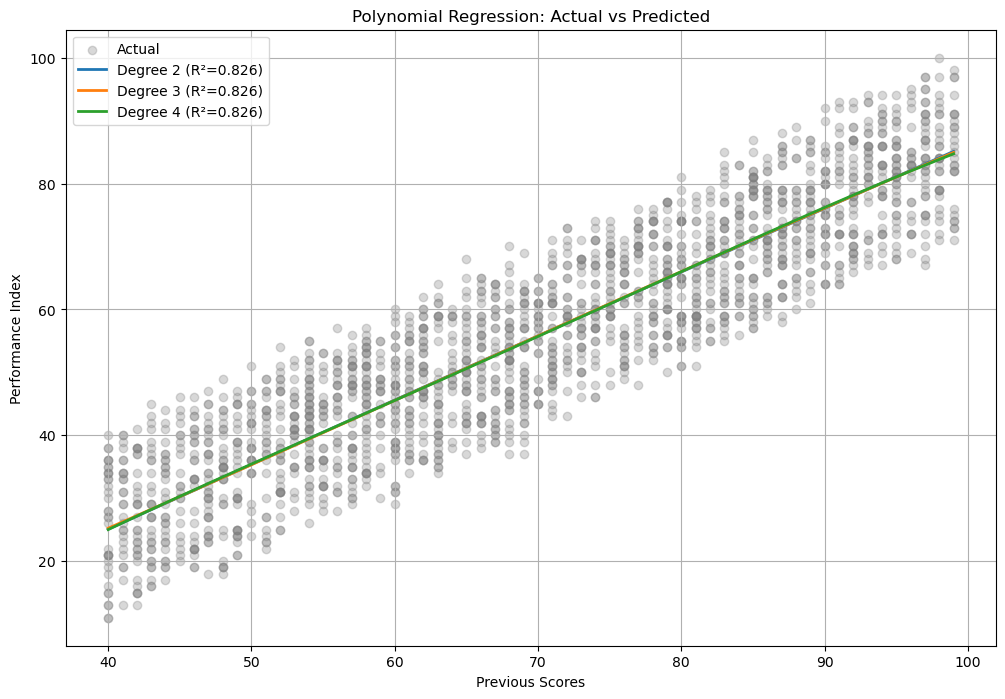

In [ ]:
sorted_idx = x_test.flatten().argsort()
X_test_sorted = x_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
plt.figure(figsize=(12, 8))
plt.scatter(x_test, y_test, color='gray', alpha=0.3, label='Actual')

for degree in degrees:
    # Recreate polynomial transformer for this degree
    poly = PolynomialFeatures(degree=degree)
    
    # Transform test data (no scaling)
    X_poly = poly.fit_transform(X_test_sorted.reshape(-1, 1))
    
    # Predict
    y_pred_sorted = results[degree]['model'].predict(X_poly)
    
    # Plot
    plt.plot(X_test_sorted, y_pred_sorted, linewidth=2, 
             label=f'Degree {degree} (R²={results[degree]["r2"]:.3f})')

plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data=pd.read_csv('/home/mohamed/Desktop/depatesDataSet/diabetes_prediction_dataset.csv')
data=pd.DataFrame(data)
print(data)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [ ]:
data.dropna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
 #Group data by gender and count diabetes cases
 
gender_diabetes = data.groupby('gender')['diabetes'].agg(['sum', 'count']).reset_index()

# Rename columns for clarity
gender_diabetes.columns = ['gender', 'diabetes_cases', 'total_people']

# Map encoded gender values back to labels (0=Female, 1=Male)
gender_diabetes['gender'] = gender_diabetes['gender'].map({0: 'Female', 1: 'Male'})

# Clean NaN values in the 'gender' column
gender_diabetes = gender_diabetes.dropna(subset=['gender'])

print(gender_diabetes)


Empty DataFrame
Columns: [gender, diabetes_cases, total_people]
Index: []


ValueError: 'explode' must be of length 'x'

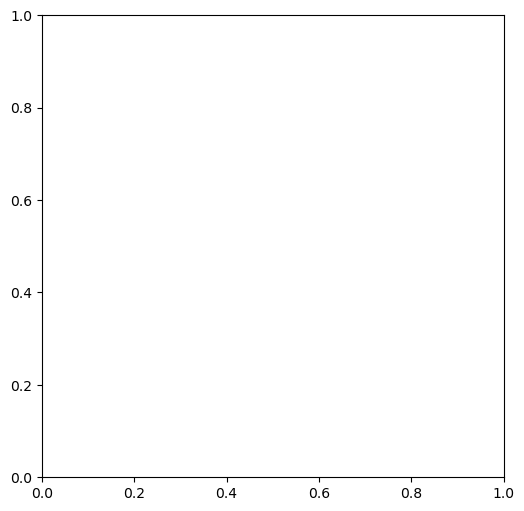

In [ ]:

plt.figure(figsize=(8, 6))
plt.pie(
    gender_diabetes['diabetes_cases'],
    labels=gender_diabetes['gender'],
    autopct='%1.1f%%',
    colors=['lightcoral', 'skyblue'],
    explode=(0, 0.1),  # Emphasize "Male" slice
    startangle=90,
    shadow=True  # Optional
)

plt.title('Proportion of Diabetes Cases by Gender')
plt.legend(title="Gender", loc="upper right")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
# Gender (binary)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  # Female: 0, Male: 1

# Smoking History (nominal)
data = pd.get_dummies(data, columns=['smoking_history'], drop_first=True)

# Separate features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

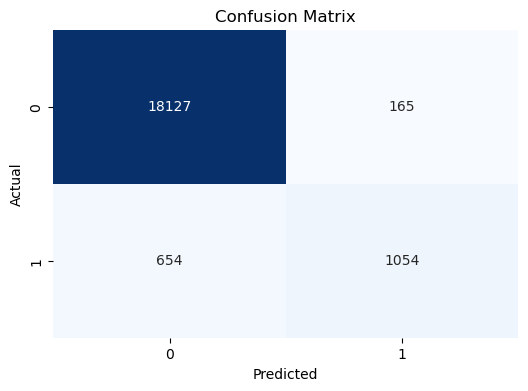

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

Interpretation
Confusion Matrix:

True Negative (TN): Correctly predicted non-diabetic.

False Positive (FP): Non-diabetic incorrectly predicted as diabetic.

False Negative (FN): Diabetic incorrectly predicted as non-diabetic.

True Positive (TP): Correctly predicted diabetic.

Classification Report:

Precision: How many predicted diabetics are actually diabetic.

Recall: How many actual diabetics are correctly predicted.

F1-Score: Harmonic mean of precision and recall.

Accuracy: Overall correctness of predictions.

